# Week 7 - Machine Learning practical

## Questions for investigation  
  
  We'll be exploring the netflix-rotten-tomatoes-metacritic-imdb.csv dataset we were working with last week.  
    
We know that our client is interested in winning awards, and we've tried analysing the data to find patterns using simple relationships between the variables.   

Now we're going to see if machine learning can come up with any insights. To do that, we need to reshape the questions we want answers to.  

Now we ask:

1. What factors appear to affect the number of awards won by a movie?  
2. Of those factors, which carry the most weight?

In [1]:
# import the modules we will need to use 
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning models and utilities 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression



## Fetching and shaping our data 
  
Different machine learning models need the input data shaped in specific ways.  
In general, a supervised model needs:
* Numeric values for the variables,  
* A target variable (the 'answer' we're looking for).  

The target variable is the class or category we want to detect, in this case whether or not a movie has won any awards.

### Import the data

In [36]:
# import dataset 
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/jargonautical/bsuBootcampCohort4/refs/heads/main/week3/netflix-rotten-tomatoes-metacritic-imdb.csv")

### Inspect the data

In [37]:
#df.columns
#df.head()
#df.sample()
#df.describe()

In [38]:
df = df.loc[df["Series or Movie"] == 'Movie']

### Select the numeric variables we will use 

In [39]:
# we want to use only numeric values, so we supply a list of these
df = df.select_dtypes(include=['float64', 'int64']) 
df.columns

Index(['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score',
       'Awards Received', 'Awards Nominated For', 'IMDb Votes'],
      dtype='object')

In [40]:
df.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
1,5.8,79.0,69.0,1.0,NaN,2838.0
2,4.3,NaN,46.0,NaN,NaN,1720.0
4,6.3,NaN,NaN,NaN,4.0,63.0
5,7.4,NaN,NaN,NaN,NaN,131.0
8,6.7,NaN,NaN,2.0,1.0,88.0


In [41]:
df['Awards Received'] = df['Awards Received'].fillna(0) 
df['Awards Nominated For'] = df['Awards Nominated For'].fillna(0) 
df.head()


,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,IMDb Votes
1,5.8,79.0,69.0,1.0,0.0,2838.0
2,4.3,NaN,46.0,0.0,0.0,1720.0
4,6.3,NaN,NaN,0.0,4.0,63.0
5,7.4,NaN,NaN,0.0,0.0,131.0
8,6.7,NaN,NaN,2.0,1.0,88.0


In [42]:
df = df.drop(columns = ['Awards Nominated For'], axis=1)
df = df.dropna()

In [43]:
df.head()

,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,IMDb Votes
1,5.8,79.0,69.0,1.0,2838.0
11,6.2,20.0,36.0,0.0,34738.0
15,8.4,68.0,59.0,112.0,951938.0
16,6.5,52.0,51.0,26.0,733336.0
17,8.1,96.0,85.0,46.0,766594.0


## Supervised learning

### Linear Regression

#### Defining our model inputs X and y

In [44]:
X = df.drop(columns = ['Awards Received'], axis = 1)
y = df['Awards Received']

#### The train-test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#### Fitting the model

In [46]:
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model intercept: -23.91025152745251
linear model coeff:
[ 5.45754309e-01 -1.73550012e-01  6.17203337e-01  3.47230881e-05]
R-squared score (training): 0.351
R-squared score (test): 0.343


#### Creating a scatter plot  
__NOTE__ We can only plot two variables, one against the other, in a scatter plot.  
To draw this plot we need to select one feature to plot against the target variable.

linear model intercept: -46.2209626399665
linear model coeff:
[8.37474061]
R-squared score (training): 0.173
R-squared score (test): 0.161


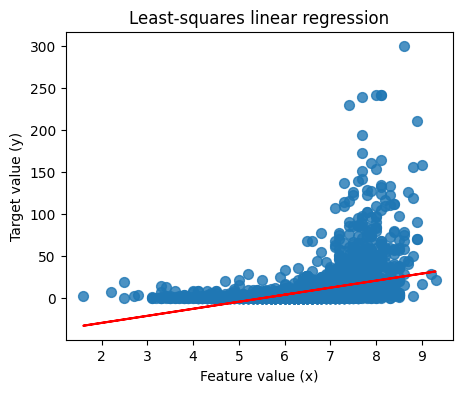

In [47]:
# Define X and y
X = df[['IMDb Score']]
y = df['Awards Received']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Logistic regression  
For this model, we are looking for a binary (Yes/No or 1/0) target variable.  
The data doesn't have this, so we create one.

#### Create a class target variable

In [48]:
# create a new column - if awards won > 0 then 1 else 0
df['winner'] = df['Awards Received'].apply(lambda x: 1 if x > 0 else 0)

In [49]:
# Define X and y 
X = df.drop(columns = ['winner', 'Awards Received'], axis = 1)
y = df['winner']
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Scale the data, because we have a scale mismatch 
# between values like votes (potentially in the thousands) 
# and scores (a percentage expressed as a decimal, from 0.00 to 1.00)

# Create an instance of a scaler model 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler model to the X_train and X_test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\LucyKnight\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


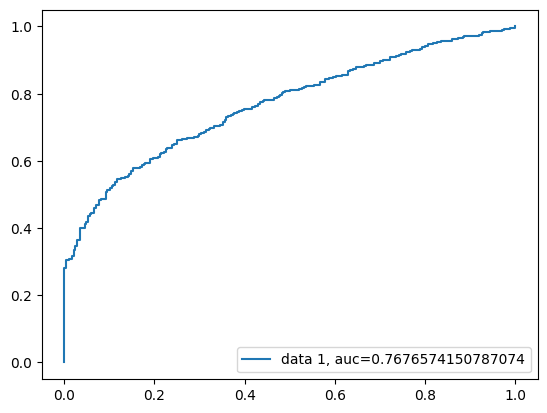

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Confusion matrix